# Palmer Penguins
***
This notebook contains my analysis of the famous palmer penguins dataset.

The dataset is avalible in [on GitHub]

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

## Imports
****

We use pandas for the DataFrame data strucuture.

It allows us to investigate CSV files, amongst other features.

### Load Data
***

Load the palmer penguins data set from a URL.

In [61]:
# Data frames.
import pandas as pd

# Numerical arrays and rando numbers.
import numpy as np

# Plot.
import matplotlib.pyplot as plt


import seaborn as sns


We will be using scikit-learn to do Principal Component Analysis with Penguins data. Let us load PCA module from scikit-learn. We will be using scikit-learn’s ability chain together multiple steps of analysis using “pipeline”.

In [62]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
#  Load the penguins data set.
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it.

In [64]:
# Let's have a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Overview about Dataset.
***
The dataset provided is related to penguins. It contains information about various penguin species observed in the Palmer Archipelago, Antarctica. Let’s explore this data further:

Species: The dataset includes three different species of penguins: Adelie, Chinstrap, and Gentoo.
Island: Penguins were collected from three different islands in the Palmer Archipelago: Torgersen, Biscoe, and Dream.
Bill Length (mm): The length of the penguin’s bill in millimeters.
Bill Depth (mm): The depth of the penguin’s bill in millimeters.
Flipper Length (mm): The length of the penguin’s flipper in millimeters.
Body Mass (g): The body mass of the penguin in grams.
Sex: The gender of the penguin (either male or female).
Year: The year when the data was collected.
Here are a few examples from the dataset:

Penguin 1 (Adelie, Torgersen):
Bill Length: 39.1 mm
Bill Depth: 18.7 mm
Flipper Length: 181 mm
Body Mass: 3750 g
Sex: Male
Year: 2007

Penguin 2 (Adelie, Torgersen):
Bill Length: 39.5 mm
Bill Depth: 17.4 mm
Flipper Length: 186 mm
Body Mass: 3800 g
Sex: Female
Year: 2007

Penguin 3 (Adelie, Torgersen):
Bill Length: 40.3 mm
Bill Depth: 18.0 mm
Flipper Length: 195 mm
Body Mass: 3250 g
Sex: Female
Year: 2007

The dataset contains a total of 344 penguins across the three species and islands.


## Inspect Data
***

#### Types of variables that will be used in this project

For explore this dataset I had decide to use two avariables sex and body-mass. 
I had chosed this 2 variable to check if it difference betwen male and female in they body-mass size. 

In [65]:
# Look at the first row.
df.iloc[0] 

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

## First Variable Sex
***

In [66]:
# Sex of penguins.
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [67]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### Table 

| Gender  | Quantity     |
|---------|--------------|
| MALE    | 168          |
| FEMALE  | 165          |


<BarContainer object of 2 artists>

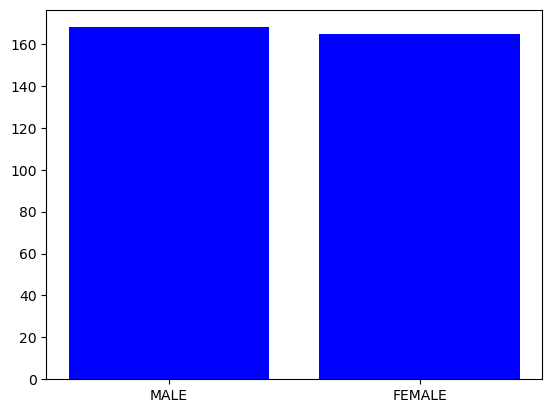

In [75]:
# Sample data (replace with your own)
x_axis = ['MALE', 'FEMALE']
y_axis = [168, 165]

# Create the bar chart
plt.bar(x_axis, y_axis, color='blue')

Analyzing the sex variable, I noticed that there is a minimal difference between male and female. 168 males and 165 females. Which is actually much better to assess the variable of body mass among them, since there is no population inequality in males and females.

## Second variable Body_Mass
***

In [76]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [77]:
# Describe body mass
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [83]:
# Select the desired columns
selected_columns = df[["sex", "body_mass_g"]]

# Print the resulting DataFrame
print(selected_columns)

        sex  body_mass_g
0      MALE       3750.0
1    FEMALE       3800.0
2    FEMALE       3250.0
3       NaN          NaN
4    FEMALE       3450.0
..      ...          ...
339     NaN          NaN
340  FEMALE       4850.0
341    MALE       5750.0
342  FEMALE       5200.0
343    MALE       5400.0

[344 rows x 2 columns]


In [84]:
# Get the counts.
values, counts = np.unique('sex', return_counts=True)

# Show.
values, counts

(array(['sex'], dtype='<U3'), array([1], dtype=int64))

In [79]:
# Assuming your DataFrame is named 'df'
selected_columns = df[['sex', 'body_mass_g']]

In [80]:
grouped_data = selected_columns.groupby('sex')['body_mass_g'].mean()

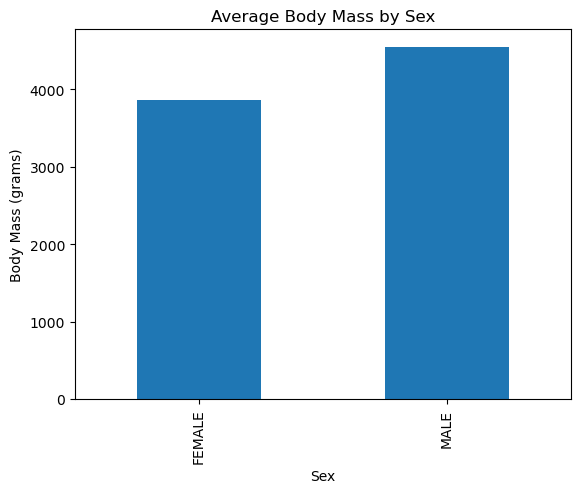

In [81]:
grouped_data.plot(kind='bar', title='Average Body Mass by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (grams)')
plt.show()

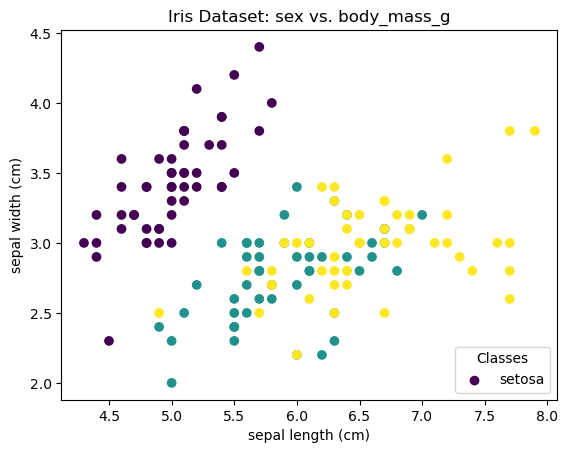

In [92]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Create a scatter plot
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset: sex vs. body_mass_g")
plt.legend(iris.target_names, loc="lower right", title="Classes")
plt.show()



# This will be big

 You *might* have a paragraph. 
 Paragraphs have sentences.
 You **might** have a paragraph. 
 Paragraphs have sentences. You might have a paragraph. Paragraphs have sentences.You might have a paragraph. Paragraphs have sentences.You might have a paragraph. Paragraphs have sentences.You might have a paragraph. Paragraphs have sentences. 

 If you want a second paragraph, leave a lank line!IIf you want a second paragraph, leave a lank line!f you want a second paragraph, leave a lank line!

## This will be slightly smaller

* Bullet
* Point
- Lists

### This will be slightty smaller again 

1. Numbered bullets.
2. Just use numbers.
2. What a mess.
3. How complex!

#### This will be slightty smaller again again 

black code
> The defintion of stupidity is doing the same thing twice and expecting diffents results! 

##### This will be slightty smaller again again again 

## Tables 
***
|Species  |Bill Length (mm)|Body Mass (g)|
|---------|---------------:|------------:|
|Adelie   |            38.8|         3701|
|Chinstrap|            48.8|         3733|
|Gentoo   |            47.5|         5076|

``` Python
print("python is a great languange!")

a = a + 1

print(a)
```

###### This will be slightty smaller again again again again 




## Math
***

$f(x) = x^2$

$\sum_{i=0}^{n-1} i$

$\bar{x} = \frac{\sum_{i=o}^ {n-1} x_i} {n}$

***
### End